Made by Arthur de Roode, 6005829.
Thesis ADS 2023.
Investigating NS train turnaround times.
The next couple of code blocks focus on data preprocessing in order to determine all the turnaround times.

In [12]:
import pandas as pd

#load september and october-december datasets
df1sep = pd.read_csv('D:/universiteit/thesis 2023/data/Dataset 1 sep.csv', sep= ';', encoding='ascii')
df1rest = pd.read_csv('D:/universiteit/thesis 2023/data/Dataset 1 - Basis Execution Data Oct-Dec.csv', sep= ';', encoding='ISO-8859-1')

#concatenate datasets
df1= pd.concat([df1sep, df1rest])

#save combined dataset
df1.to_csv('D:/universiteit/thesis 2023/data/Dataset 1 - sep-dec.csv', index=False)

#load september and october-december datasets
df3sep = pd.read_csv('D:/universiteit/thesis 2023/data/Dataset 3 + Driver Change Sep.csv', sep= ';', encoding='ascii')
df3rest = pd.read_csv('D:/universiteit/thesis 2023/data/Dataset 3 + Driver Change Oct - Dec.csv', sep= ';', encoding='ascii')

#concatenate datasets
df3 = pd.concat([df3sep, df3rest])

#save combined dataset
df3.to_csv('D:/universiteit/thesis 2023/data/Dataset 3 - sep-dec.csv', index=False)

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/universiteit/thesis 2023/data/Dataset 1 - sep-dec.csv')

# removing irrelevant columns to make datasize more manageable
columns_to_remove = ['Id', 'bewegingId', 'trajectId', 'planfase', 'kalenderdag',
                     'verkeersdag', 'vervoerder', 'act_drglptVolgendLandcode', 'dienstregeljaar',
                     'week', 'kwartaal', 'maand', 'kalenderjaar', 'bijzVd_ind', 'feestdag_ind',
                     'treinstop', 'bakstop', 'treinserie_basis', 'act_drglpt_is_hrn',
                     'act_drglpt_is_grenspunt', 'act_drglptLandcode', 'rijkar_plan', 'rijkar_operatie',
                     'act_Oplantijd', 'act_OplantijdVolgend', 'treinKilometers', 'materieelKilometers',
                     'zitplaatsKilometers', 'reizigersplaatskilometers', 'bakKilometers', 'stelKilometers']

df = df.drop(columns=columns_to_remove)

# Save the modified DataFrame
df.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified.csv', sep=',', index=False)

C:\Users\arthu\AppData\Local\Temp\ipykernel_10328\886037459.py:4: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/Dataset 1 - sep-dec.csv')


In [4]:
import pandas as pd

#Read dataset 1 and apply filter
#Reason being that rows containing 'halteren' were not needed to determine turnaround times.
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified.csv', sep=',')
df = df[df['proces'] == 'Rijden']

df.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified,Rijden only.csv', index=False)

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/universiteit/thesis 2023/data/Dataset 3 - sep-dec.csv')

# removing irrelevant columns to make datasize more manageable
columns_to_drop = ['SL_VERVOERDER', 'SL_VERTREKSPOOR', 'SL_DRGLPT_GEMETEN_IND', 'SL_MINIMALE_VERTREK_VTG', 'SL_OPLANTIJD_AANKOMST', 'SL_OPLANTIJD_VERTREK']
df.drop(columns_to_drop, axis=1, inplace=True)

# Save the modified dataset
output_path = 'D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv'
df.to_csv(output_path, index=False)

In [6]:
import pandas as pd
df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',')

#removing all rows in dataset 3 where a turnaround does not occur, to significantly reduce data size
df3 = df3[df3['SL_RIJRICHTINGKERING_IND'] == 1]

df3.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', index=False)

In [7]:
import re
import pandas as pd

#function to sort numbers in material number column from low to high
def parse_mat_nummer(nummer_str: str): 
    sep = nummer_str.replace(',', ' ')
    stripped = re.sub(r'[^0-9\s]', "", sep)
    sorted_list = sorted(stripped.split(' '))
    return " ".join(sorted_list)

# Load the dataset into a DataFrame
df1 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified,Rijden only.csv', sep=',')

#sorting the matnr column from low to high.
df1['matnr'] = df1['matnr'].astype(str)
df1['matnr'] = df1['matnr'].apply(parse_mat_nummer)

df1.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified,Rijden only.csv', sep=',', index=False)

In [8]:
import re
import pandas as pd

#function to sort numbers in material number column from low to high
def parse_mat_nummer(nummer_str: str): 
    sep = nummer_str.replace(',', ' ')
    stripped = re.sub(r'[^0-9\s]', "", sep)
    sorted_list = sorted(stripped.split(' '))
    return " ".join(sorted_list)

# Load the dataset into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',')

#sorting the SL_MAT_NUMMER column from low to high.
df['SL_MAT_NUMMER'] = df['SL_MAT_NUMMER'].astype(str)
df['SL_MAT_NUMMER'] = df['SL_MAT_NUMMER'].apply(parse_mat_nummer)

#Removing all rows in dataset 3 a combining and splitting of trains occurs, because its impossible to determine a turnaround time in this scenario.

df.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',', index=False)

In [15]:
import pandas as pd

df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',')

total_rows = len(df3)  # Total number of rows before filtering

# Selecting rows where both conditions are 1
df_removed = df3[(df3['SL_COMBINEREN_IND'] == 1) & (df3['SL_SPLITSEN_IND'] == 1)]

removed_rows = len(df_removed)  # Number of rows to be removed

# Removing selected rows
df3 = df3.drop(df_removed.index)

df3.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',', index=False)

remaining_rows = len(df3)  # Number of remaining rows

print(f"Removed {removed_rows} rows out of {total_rows}.")
print(f"{remaining_rows} rows remaining.")

Removed 602 rows out of 291823.
291221 rows remaining.


In [16]:
import pandas as pd
import numpy as np

#splitting dataset 3 based on whether a turnaround occurs without a renumbering and also splitting based on whether a combination or splitting occurs during the turnaround
#reason being that a turnaround time is determined differently based on a renumbering occuring or not
df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',')

df3['SL_OMNUMMERING'] = df3['SL_OMNUMMERING'].str.replace('\D', '', regex=True)
df3['SL_OMNUMMERING'] = df3['SL_OMNUMMERING'].str.replace(' ', '', regex=True)
df3['SL_OMNUMMERING'] = df3['SL_OMNUMMERING'].replace('', np.nan) 
df3['SL_OMNUMMERING'] = df3['SL_OMNUMMERING'].fillna(0).astype('int64')
df3 = df3[(df3['SL_OMNUMMERING'] == 0) & (df3['SL_COMBINEREN_IND'] == 0) & (df3['SL_SPLITSEN_IND'] == 0)]

df3.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb0 split0.csv', sep=',', index=False)

df31 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',')

df31['SL_OMNUMMERING'] = df31['SL_OMNUMMERING'].str.replace('\D', '', regex=True)
df31['SL_OMNUMMERING'] = df31['SL_OMNUMMERING'].str.replace(' ', '', regex=True)
df31['SL_OMNUMMERING'] = df31['SL_OMNUMMERING'].replace('', np.nan) 
df31['SL_OMNUMMERING'] = df31['SL_OMNUMMERING'].fillna(0).astype('int64')
df31 = df31[(df31['SL_OMNUMMERING'] == 0) & (df31['SL_COMBINEREN_IND'] == 1) & (df31['SL_SPLITSEN_IND'] == 0)]

df31.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb1 split0.csv', sep=',', index=False)

df32 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',')

df32['SL_OMNUMMERING'] = df32['SL_OMNUMMERING'].str.replace('\D', '', regex=True)
df32['SL_OMNUMMERING'] = df32['SL_OMNUMMERING'].str.replace(' ', '', regex=True)
df32['SL_OMNUMMERING'] = df32['SL_OMNUMMERING'].replace('', np.nan) 
df32['SL_OMNUMMERING'] = df32['SL_OMNUMMERING'].fillna(0).astype('int64')
df32 = df32[(df32['SL_OMNUMMERING'] == 0) & (df32['SL_COMBINEREN_IND'] == 0) & (df32['SL_SPLITSEN_IND'] == 1)]

df32.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb0 split1.csv', sep=',', index=False)

#splitting dataset 3 based on whether a turnaround occurs with a renumbering and also splitting based on whether a combination or splitting occurs during the turnaround
df33 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',')

df33['SL_OMNUMMERING'] = df33['SL_OMNUMMERING'].str.replace('\D', '', regex=True)
df33['SL_OMNUMMERING'] = df33['SL_OMNUMMERING'].str.replace(' ', '', regex=True)
df33['SL_OMNUMMERING'] = df33['SL_OMNUMMERING'].replace('', np.nan) 
df33['SL_OMNUMMERING'] = df33['SL_OMNUMMERING'].fillna(0).astype('int64')
df33 = df33[(df33['SL_OMNUMMERING'] != 0) & (df33['SL_COMBINEREN_IND'] == 0) & (df33['SL_SPLITSEN_IND'] == 0)]

df33.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb0 split0.csv', sep=',', index=False)

df34 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',')

df34['SL_OMNUMMERING'] = df34['SL_OMNUMMERING'].str.replace('\D', '', regex=True)
df34['SL_OMNUMMERING'] = df34['SL_OMNUMMERING'].str.replace(' ', '', regex=True)
df34['SL_OMNUMMERING'] = df34['SL_OMNUMMERING'].replace('', np.nan) 
df34['SL_OMNUMMERING'] = df34['SL_OMNUMMERING'].fillna(0).astype('int64')
df34 = df34[(df34['SL_OMNUMMERING'] != 0) & (df34['SL_COMBINEREN_IND'] == 1) & (df34['SL_SPLITSEN_IND'] == 0)]

df34.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb1 split0.csv', sep=',', index=False)

df35 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 sep-dec modified.csv', sep=',')

df35['SL_OMNUMMERING'] = df35['SL_OMNUMMERING'].str.replace('\D', '', regex=True)
df35['SL_OMNUMMERING'] = df35['SL_OMNUMMERING'].str.replace(' ', '', regex=True)
df35['SL_OMNUMMERING'] = df35['SL_OMNUMMERING'].replace('', np.nan) 
df35['SL_OMNUMMERING'] = df35['SL_OMNUMMERING'].fillna(0).astype('int64')
df35 = df35[(df35['SL_OMNUMMERING'] != 0) & (df35['SL_COMBINEREN_IND'] == 0) & (df35['SL_SPLITSEN_IND'] == 1)]

df35.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb0 split1.csv', sep=',', index=False)

In [17]:
import pandas as pd

#loading dataset 1 and dataset 3(containing turnarounds with renumbering)
df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb0 split0.csv', sep=',')
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified,Rijden only.csv', sep=',')
 
#setting correct datatypes
df3['SL_OMNUMMERING'] = df3['SL_OMNUMMERING'].astype('int64')
df3['SL_VERKEERSDATUM'] = pd.to_datetime(df3['SL_VERKEERSDATUM'], format='%d%b%Y').dt.date
df3['SL_DRGLPT'] = df3['SL_DRGLPT'].astype('str')
df3['SL_MAT_NUMMER'] = df3['SL_MAT_NUMMER'].astype('str')
df3['SL_TREINNR'] = df3['SL_TREINNR'].astype('int64')

df['bewegingcode'] = df['bewegingcode'].astype('int64')
df['verkeersdatum'] = pd.to_datetime(df['verkeersdatum'], format='%d%b%Y').dt.date
df['act_drglptVolgend'] = df['act_drglptVolgend'].astype('str')
df['matnr'] = df['matnr'].astype('str')

#merging data from dataset 1 into dataset 3
merged_data = df3.merge(df[['act_drglptVolgend', 'verkeersdatum', 'matnr', 'bewegingcode', 'spitstype', 'act_drglpt_stationsklasse', 'act_uitvoertijdVolgend', 'act_AplantijdVolgend',
                       'act_drglpt_TBregio_afk', 'matSoort', 'materieelDienst', 'materieelDienstgroep',
                       'zitplaatsen', 'vervoersplaatsen', 'afstand', 'aantal_bakken', 'aantal_stellen']],
                                        left_on=['SL_DRGLPT', 'SL_OMNUMMERING', 'SL_VERKEERSDATUM', 'SL_MAT_NUMMER'],
                                        right_on=['act_drglptVolgend', 'bewegingcode', 'verkeersdatum', 'matnr'],
                                        how='left')

merged_data.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb0 split0 transferred.csv', sep=',', index=False)

C:\Users\arthu\AppData\Local\Temp\ipykernel_10328\4138295494.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb0 split0.csv', sep=',')


In [18]:
import pandas as pd
import numpy as np

#loading filtered dataset 1 and dataset 3(containing turnarounds without renumbering)
df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb0 split0.csv', sep=',')
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified,Rijden only.csv', sep=',')

#setting correct datatypes
df3['SL_VERKEERSDATUM'] = pd.to_datetime(df3['SL_VERKEERSDATUM'], format='%d%b%Y').dt.date
df3['SL_DRGLPT'] = df3['SL_DRGLPT'].astype('str')
df3['SL_MAT_NUMMER'] = df3['SL_MAT_NUMMER'].astype('str')
df3['SL_TREINNR'] = df3['SL_TREINNR'].astype('int64')

df['bewegingcode'] = df['bewegingcode'].astype('int64')
df['verkeersdatum'] = pd.to_datetime(df['verkeersdatum'], format='%d%b%Y').dt.date
df['act_drglptVolgend'] = df['act_drglptVolgend'].astype('str')
df['matnr'] = df['matnr'].astype('str')

#merging data from dataset 1 into dataset 3
merged_data = df3.merge(df[['act_drglptVolgend', 'verkeersdatum', 'matnr', 'bewegingcode', 'spitstype', 'act_drglpt_stationsklasse', 'act_uitvoertijdVolgend', 'act_AplantijdVolgend',
                       'act_drglpt_TBregio_afk', 'matSoort', 'materieelDienst', 'materieelDienstgroep',
                       'zitplaatsen', 'vervoersplaatsen', 'afstand', 'aantal_bakken', 'aantal_stellen']],
                                        left_on=['SL_DRGLPT', 'SL_TREINNR', 'SL_VERKEERSDATUM', 'SL_MAT_NUMMER'],
                                        right_on=['act_drglptVolgend', 'bewegingcode', 'verkeersdatum', 'matnr'],
                                        how='left')

merged_data.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb0 split0 transferred.csv', index=False)

In [24]:
import pandas as pd

# Read the datasets to check what the formats are for the datetime columns.
df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb1 split0.csv', sep=',')
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified,Rijden only.csv', sep=',')

print("df - act_uitvoertijdVolgend first value: ", df['act_uitvoertijdVolgend'].iloc[0])
print("df - act_AplantijdVolgend first value: ", df['act_AplantijdVolgend'].iloc[0])
print("df - verkeersdatum first value: ", df['verkeersdatum'].iloc[0])

print("df3 - SL_VERKEERSDATUM first value: ", df3['SL_VERKEERSDATUM'].iloc[0])
print("df3 - SL_BASIC_UITVTIJD_VERTREK first value: ", df3['SL_BASIC_UITVTIJD_VERTREK'].iloc[0])

df - act_uitvoertijdVolgend first value:  01SEP2022:06:36:50
df - act_AplantijdVolgend first value:  01SEP2022:06:36:00
df - verkeersdatum first value:  01SEP2022
df3 - SL_VERKEERSDATUM first value:  01SEP2022
df3 - SL_BASIC_UITVTIJD_VERTREK first value:  01SEP22:07:05:26


In [27]:
import pandas as pd

# Load df
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified,Rijden only.csv', sep=',')

# Convert formats
df['verkeersdatum'] = pd.to_datetime(df['verkeersdatum'], format='%d%b%Y')
df['act_drglptVolgend'] = df['act_drglptVolgend'].astype(str)
df['act_uitvoertijdVolgend'] = pd.to_datetime(df['act_uitvoertijdVolgend'], format='%d%b%Y:%H:%M:%S')
df['act_AplantijdVolgend'] = pd.to_datetime(df['act_AplantijdVolgend'], format='%d%b%Y:%H:%M:%S')
df['matnr'] = df['matnr'].astype(str)

# Load df3
df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb1 split0.csv', sep=',')

# Convert formats
df3['SL_DRGLPT'] = df3['SL_DRGLPT'].astype(str)
df3['SL_VERKEERSDATUM'] = pd.to_datetime(df3['SL_VERKEERSDATUM'], format='%d%b%Y')
df3['SL_MAT_NUMMER'] = df3['SL_MAT_NUMMER'].astype(str)
df3['SL_BASIC_UITVTIJD_VERTREK'] = pd.to_datetime(df3['SL_BASIC_UITVTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')

# Counter for the number of values added
count_values_added = 0

# Get unique dates from SL_VERKEERSDATUM in df3
unique_dates = df3['SL_VERKEERSDATUM'].unique()

# Create a new column 'act_uitvoertijdVolgend' in df3
df3['act_drglptVolgend'] = pd.NaT
df3['verkeersdatum'] = pd.NaT
df3['matnr'] = pd.NaT
df3['bewegingcode'] = pd.NaT
df3['spitstype'] = pd.NaT
df3['act_drglpt_stationsklasse'] = pd.NaT
df3['act_uitvoertijdVolgend'] = pd.NaT
df3['act_AplantijdVolgend'] = pd.NaT
df3['act_drglpt_TBregio_afk'] = pd.NaT
df3['matSoort'] = pd.NaT
df3['materieelDienst'] = pd.NaT
df3['materieelDienstgroep'] = pd.NaT
df3['zitplaatsen'] = pd.NaT
df3['vervoersplaatsen'] = pd.NaT
df3['afstand'] = pd.NaT
df3['aantal_bakken'] = pd.NaT
df3['aantal_stellen'] = pd.NaT

# Iterate over each row in df3
for index, row in df3.iterrows():
    combineren_ind = row['SL_COMBINEREN_IND']
    mat_nummers = row['SL_MAT_NUMMER'].split()
    verkeersdatum = row['SL_VERKEERSDATUM']
    drglpt = row['SL_DRGLPT']
    
    if combineren_ind == 1:
        # Filter df based on verkeersdatum
        filtered_df = df[df['verkeersdatum'] == verkeersdatum]
        
        # Find matching rows in filtered_df based on matnr and act_drglptVolgend
        matching_rows = filtered_df[(filtered_df['matnr'].isin(mat_nummers)) &
                                    (filtered_df['act_drglptVolgend'] == drglpt)]
        
        if not matching_rows.empty:
            # Calculate the time difference between SL_BASIC_UITVTIJD_VERTREK in df3 and act_uitvoertijdVolgend in matching rows
            time_diff = abs(matching_rows['act_uitvoertijdVolgend'] - row['SL_BASIC_UITVTIJD_VERTREK'])
            
            # Find the closest row based on time difference
            closest_time_row = matching_rows.loc[time_diff.idxmin()]
            
            # Transfer the act_uitvoertijdVolgend value to df3's act_uitvoertijdVolgend column
            df3.at[index, 'act_drglptVolgend'] = closest_time_row['act_drglptVolgend']
            df3.at[index, 'verkeersdatum'] = closest_time_row['verkeersdatum']
            df3.at[index, 'matnr'] = closest_time_row['matnr']
            df3.at[index, 'bewegingcode'] = closest_time_row['bewegingcode']
            df3.at[index, 'spitstype'] = closest_time_row['spitstype']
            df3.at[index, 'act_drglpt_stationsklasse'] = closest_time_row['act_drglpt_stationsklasse']
            df3.at[index, 'act_uitvoertijdVolgend'] = closest_time_row['act_uitvoertijdVolgend']
            df3.at[index, 'act_AplantijdVolgend'] = closest_time_row['act_AplantijdVolgend']
            df3.at[index, 'act_drglpt_TBregio_afk'] = closest_time_row['act_drglpt_TBregio_afk']
            df3.at[index, 'matSoort'] = closest_time_row['matSoort']
            df3.at[index, 'materieelDienst'] = closest_time_row['materieelDienst']
            df3.at[index, 'materieelDienstgroep'] = closest_time_row['materieelDienstgroep']
            df3.at[index, 'zitplaatsen'] = closest_time_row['zitplaatsen']
            df3.at[index, 'vervoersplaatsen'] = closest_time_row['vervoersplaatsen']
            df3.at[index, 'afstand'] = closest_time_row['afstand']
            df3.at[index, 'aantal_bakken'] = closest_time_row['aantal_bakken']
            df3.at[index, 'aantal_stellen'] = closest_time_row['aantal_stellen']
            
            # Increment the counter for the number of values added
            count_values_added += 1

# Print the number of values added
print(f"Number of values added to 'df3': {count_values_added}")

df3.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb1 split0 transferred.csv', sep=',', index=False)

Number of values added to 'df3': 215


In [ ]:
import pandas as pd

# Load df
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified,Rijden only.csv', sep=',')

# Convert formats
df['verkeersdatum'] = pd.to_datetime(df['verkeersdatum'], format='%d%b%Y')
df['act_drglptVolgend'] = df['act_drglptVolgend'].astype(str)
df['act_uitvoertijdVolgend'] = pd.to_datetime(df['act_uitvoertijdVolgend'], format='%d%b%Y:%H:%M:%S')
df['act_AplantijdVolgend'] = pd.to_datetime(df['act_AplantijdVolgend'], format='%d%b%Y:%H:%M:%S')
df['matnr'] = df['matnr'].astype(str)

# Load df3
df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb1 split0.csv', sep=',')

# Convert formats
df3['SL_DRGLPT'] = df3['SL_DRGLPT'].astype(str)
df3['SL_VERKEERSDATUM'] = pd.to_datetime(df3['SL_VERKEERSDATUM'], format='%d%b%Y')
df3['SL_MAT_NUMMER'] = df3['SL_MAT_NUMMER'].astype(str)
df3['SL_BASIC_UITVTIJD_VERTREK'] = pd.to_datetime(df3['SL_BASIC_UITVTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')

# Counter for the number of values added
count_values_added = 0

# Get unique dates from SL_VERKEERSDATUM in df3
unique_dates = df3['SL_VERKEERSDATUM'].unique()

# Create a new column 'act_uitvoertijdVolgend' in df3
df3['act_drglptVolgend'] = pd.NaT
df3['verkeersdatum'] = pd.NaT
df3['matnr'] = pd.NaT
df3['bewegingcode'] = pd.NaT
df3['spitstype'] = pd.NaT
df3['act_drglpt_stationsklasse'] = pd.NaT
df3['act_uitvoertijdVolgend'] = pd.NaT
df3['act_AplantijdVolgend'] = pd.NaT
df3['act_drglpt_TBregio_afk'] = pd.NaT
df3['matSoort'] = pd.NaT
df3['materieelDienst'] = pd.NaT
df3['materieelDienstgroep'] = pd.NaT
df3['zitplaatsen'] = pd.NaT
df3['vervoersplaatsen'] = pd.NaT
df3['afstand'] = pd.NaT
df3['aantal_bakken'] = pd.NaT
df3['aantal_stellen'] = pd.NaT

# Iterate over each row in df3
for index, row in df3.iterrows():
    combineren_ind = row['SL_COMBINEREN_IND']
    mat_nummers = row['SL_MAT_NUMMER'].split()
    verkeersdatum = row['SL_VERKEERSDATUM']
    drglpt = row['SL_DRGLPT']
    
    if combineren_ind == 1:
        # Filter df based on verkeersdatum
        filtered_df = df[df['verkeersdatum'] == verkeersdatum]
        
        # Find matching rows in filtered_df based on matnr and act_drglptVolgend
        matching_rows = filtered_df[(filtered_df['matnr'].isin(mat_nummers)) &
                                    (filtered_df['act_drglptVolgend'] == drglpt)]
        
        if not matching_rows.empty:
            # Calculate the time difference between SL_BASIC_UITVTIJD_VERTREK in df3 and act_uitvoertijdVolgend in matching rows
            time_diff = abs(matching_rows['act_uitvoertijdVolgend'] - row['SL_BASIC_UITVTIJD_VERTREK'])
            
            # Find the closest row based on time difference
            closest_time_row = matching_rows.loc[time_diff.idxmin()]
            
            # Transfer the act_uitvoertijdVolgend value to df3's act_uitvoertijdVolgend column
            df3.at[index, 'act_drglptVolgend'] = closest_time_row['act_drglptVolgend']
            df3.at[index, 'verkeersdatum'] = closest_time_row['verkeersdatum']
            df3.at[index, 'matnr'] = closest_time_row['matnr']
            df3.at[index, 'bewegingcode'] = closest_time_row['bewegingcode']
            df3.at[index, 'spitstype'] = closest_time_row['spitstype']
            df3.at[index, 'act_drglpt_stationsklasse'] = closest_time_row['act_drglpt_stationsklasse']
            df3.at[index, 'act_uitvoertijdVolgend'] = closest_time_row['act_uitvoertijdVolgend']
            df3.at[index, 'act_AplantijdVolgend'] = closest_time_row['act_AplantijdVolgend']
            df3.at[index, 'act_drglpt_TBregio_afk'] = closest_time_row['act_drglpt_TBregio_afk']
            df3.at[index, 'matSoort'] = closest_time_row['matSoort']
            df3.at[index, 'materieelDienst'] = closest_time_row['materieelDienst']
            df3.at[index, 'materieelDienstgroep'] = closest_time_row['materieelDienstgroep']
            df3.at[index, 'zitplaatsen'] = closest_time_row['zitplaatsen']
            df3.at[index, 'vervoersplaatsen'] = closest_time_row['vervoersplaatsen']
            df3.at[index, 'afstand'] = closest_time_row['afstand']
            df3.at[index, 'aantal_bakken'] = closest_time_row['aantal_bakken']
            df3.at[index, 'aantal_stellen'] = closest_time_row['aantal_stellen']
            
            # Increment the counter for the number of values added
            count_values_added += 1

# Print the number of values added
print(f"Number of values added to 'df3': {count_values_added}")

df3.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb1 split0 transferred.csv', sep=',', index=False)

In [29]:
import pandas as pd

# Load df
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified,Rijden only.csv', sep=',')

# Convert formats
df['verkeersdatum'] = pd.to_datetime(df['verkeersdatum'], format='%d%b%Y')
df['act_drglptVolgend'] = df['act_drglptVolgend'].astype(str)
df['act_uitvoertijdVolgend'] = pd.to_datetime(df['act_uitvoertijdVolgend'], format='%d%b%Y:%H:%M:%S')
df['act_AplantijdVolgend'] = pd.to_datetime(df['act_AplantijdVolgend'], format='%d%b%Y:%H:%M:%S')
df['matnr'] = df['matnr'].astype(str)

# Load df3
df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb0 split1.csv', sep=',')

# Convert formats
df3['SL_DRGLPT'] = df3['SL_DRGLPT'].astype(str)
df3['SL_VERKEERSDATUM'] = pd.to_datetime(df3['SL_VERKEERSDATUM'], format='%d%b%Y')
df3['SL_MAT_NUMMER'] = df3['SL_MAT_NUMMER'].astype(str)
df3['SL_BASIC_UITVTIJD_VERTREK'] = pd.to_datetime(df3['SL_BASIC_UITVTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')

# Counter for the number of values added
count_values_added = 0

# Get unique dates from SL_VERKEERSDATUM in df3
unique_dates = df3['SL_VERKEERSDATUM'].unique()

# Create a new column 'act_uitvoertijdVolgend' in df3
df3['act_drglptVolgend'] = pd.NaT
df3['verkeersdatum'] = pd.NaT
df3['matnr'] = pd.NaT
df3['bewegingcode'] = pd.NaT
df3['spitstype'] = pd.NaT
df3['act_drglpt_stationsklasse'] = pd.NaT
df3['act_uitvoertijdVolgend'] = pd.NaT
df3['act_AplantijdVolgend'] = pd.NaT
df3['act_drglpt_TBregio_afk'] = pd.NaT
df3['matSoort'] = pd.NaT
df3['materieelDienst'] = pd.NaT
df3['materieelDienstgroep'] = pd.NaT
df3['zitplaatsen'] = pd.NaT
df3['vervoersplaatsen'] = pd.NaT
df3['afstand'] = pd.NaT
df3['aantal_bakken'] = pd.NaT
df3['aantal_stellen'] = pd.NaT

# Iterate over each row in df3
for index, row in df3.iterrows():
    splitsen_ind = row['SL_SPLITSEN_IND']
    mat_nummer = row['SL_MAT_NUMMER']
    verkeersdatum = row['SL_VERKEERSDATUM']
    drglpt = row['SL_DRGLPT']
    
    if splitsen_ind == 1:
        # Filter df based on verkeersdatum
        filtered_df = df[df['verkeersdatum'] == verkeersdatum]
        
        # Find matching rows in filtered_df based on matnr and act_drglptVolgend
        matching_rows = filtered_df[(filtered_df['matnr'].str.split().apply(lambda x: mat_nummer in x)) &
                                    (filtered_df['act_drglptVolgend'] == drglpt)]
        
        if not matching_rows.empty:
            # Calculate the time difference between SL_BASIC_UITVTIJD_VERTREK in df3 and act_uitvoertijdVolgend in matching rows
            time_diff = abs(matching_rows['act_uitvoertijdVolgend'] - row['SL_BASIC_UITVTIJD_VERTREK'])
            
            # Find the closest row based on time difference
            closest_time_row = matching_rows.loc[time_diff.idxmin()]
            
            # Transfer the act_uitvoertijdVolgend value to df3's act_uitvoertijdVolgend column
            df3.at[index, 'act_drglptVolgend'] = closest_time_row['act_drglptVolgend']
            df3.at[index, 'verkeersdatum'] = closest_time_row['verkeersdatum']
            df3.at[index, 'matnr'] = closest_time_row['matnr']
            df3.at[index, 'bewegingcode'] = closest_time_row['bewegingcode']
            df3.at[index, 'spitstype'] = closest_time_row['spitstype']
            df3.at[index, 'act_drglpt_stationsklasse'] = closest_time_row['act_drglpt_stationsklasse']
            df3.at[index, 'act_uitvoertijdVolgend'] = closest_time_row['act_uitvoertijdVolgend']
            df3.at[index, 'act_AplantijdVolgend'] = closest_time_row['act_AplantijdVolgend']
            df3.at[index, 'act_drglpt_TBregio_afk'] = closest_time_row['act_drglpt_TBregio_afk']
            df3.at[index, 'matSoort'] = closest_time_row['matSoort']
            df3.at[index, 'materieelDienst'] = closest_time_row['materieelDienst']
            df3.at[index, 'materieelDienstgroep'] = closest_time_row['materieelDienstgroep']
            df3.at[index, 'zitplaatsen'] = closest_time_row['zitplaatsen']
            df3.at[index, 'vervoersplaatsen'] = closest_time_row['vervoersplaatsen']
            df3.at[index, 'afstand'] = closest_time_row['afstand']
            df3.at[index, 'aantal_bakken'] = closest_time_row['aantal_bakken']
            df3.at[index, 'aantal_stellen'] = closest_time_row['aantal_stellen']
            
            # Increment the counter for the number of values added
            count_values_added += 1

# Print the number of values added
print(f"Number of values added to 'df3': {count_values_added}")

df3.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb0 split1 transferred.csv', sep=',', index=False)

Number of values added to 'df3': 241


In [30]:
import pandas as pd

# Load df
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 1 sep-dec modified,Rijden only.csv', sep=',')

# Convert formats
df['verkeersdatum'] = pd.to_datetime(df['verkeersdatum'], format='%d%b%Y')
df['act_drglptVolgend'] = df['act_drglptVolgend'].astype(str)
df['act_uitvoertijdVolgend'] = pd.to_datetime(df['act_uitvoertijdVolgend'], format='%d%b%Y:%H:%M:%S')
df['act_AplantijdVolgend'] = pd.to_datetime(df['act_AplantijdVolgend'], format='%d%b%Y:%H:%M:%S')
df['matnr'] = df['matnr'].astype(str)

# Load df3
df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb0 split1.csv', sep=',')

# Convert formats
df3['SL_DRGLPT'] = df3['SL_DRGLPT'].astype(str)
df3['SL_VERKEERSDATUM'] = pd.to_datetime(df3['SL_VERKEERSDATUM'], format='%d%b%Y')
df3['SL_MAT_NUMMER'] = df3['SL_MAT_NUMMER'].astype(str)
df3['SL_BASIC_UITVTIJD_VERTREK'] = pd.to_datetime(df3['SL_BASIC_UITVTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')

# Counter for the number of values added
count_values_added = 0

# Get unique dates from SL_VERKEERSDATUM in df3
unique_dates = df3['SL_VERKEERSDATUM'].unique()

# Create a new column 'act_uitvoertijdVolgend' in df3
df3['act_drglptVolgend'] = pd.NaT
df3['verkeersdatum'] = pd.NaT
df3['matnr'] = pd.NaT
df3['bewegingcode'] = pd.NaT
df3['spitstype'] = pd.NaT
df3['act_drglpt_stationsklasse'] = pd.NaT
df3['act_uitvoertijdVolgend'] = pd.NaT
df3['act_AplantijdVolgend'] = pd.NaT
df3['act_drglpt_TBregio_afk'] = pd.NaT
df3['matSoort'] = pd.NaT
df3['materieelDienst'] = pd.NaT
df3['materieelDienstgroep'] = pd.NaT
df3['zitplaatsen'] = pd.NaT
df3['vervoersplaatsen'] = pd.NaT
df3['afstand'] = pd.NaT
df3['aantal_bakken'] = pd.NaT
df3['aantal_stellen'] = pd.NaT

# Iterate over each row in df3
for index, row in df3.iterrows():
    splitsen_ind = row['SL_SPLITSEN_IND']
    mat_nummer = row['SL_MAT_NUMMER']
    verkeersdatum = row['SL_VERKEERSDATUM']
    drglpt = row['SL_DRGLPT']
    
    if splitsen_ind == 1:
        # Filter df based on verkeersdatum
        filtered_df = df[df['verkeersdatum'] == verkeersdatum]
        
        # Find matching rows in filtered_df based on matnr and act_drglptVolgend
        matching_rows = filtered_df[(filtered_df['matnr'].str.split().apply(lambda x: mat_nummer in x)) &
                                    (filtered_df['act_drglptVolgend'] == drglpt)]
        
        if not matching_rows.empty:
            # Calculate the time difference between SL_BASIC_UITVTIJD_VERTREK in df3 and act_uitvoertijdVolgend in matching rows
            time_diff = abs(matching_rows['act_uitvoertijdVolgend'] - row['SL_BASIC_UITVTIJD_VERTREK'])
            
            # Find the closest row based on time difference
            closest_time_row = matching_rows.loc[time_diff.idxmin()]
            
            # Transfer the act_uitvoertijdVolgend value to df3's act_uitvoertijdVolgend column
            df3.at[index, 'act_drglptVolgend'] = closest_time_row['act_drglptVolgend']
            df3.at[index, 'verkeersdatum'] = closest_time_row['verkeersdatum']
            df3.at[index, 'matnr'] = closest_time_row['matnr']
            df3.at[index, 'bewegingcode'] = closest_time_row['bewegingcode']
            df3.at[index, 'spitstype'] = closest_time_row['spitstype']
            df3.at[index, 'act_drglpt_stationsklasse'] = closest_time_row['act_drglpt_stationsklasse']
            df3.at[index, 'act_uitvoertijdVolgend'] = closest_time_row['act_uitvoertijdVolgend']
            df3.at[index, 'act_AplantijdVolgend'] = closest_time_row['act_AplantijdVolgend']
            df3.at[index, 'act_drglpt_TBregio_afk'] = closest_time_row['act_drglpt_TBregio_afk']
            df3.at[index, 'matSoort'] = closest_time_row['matSoort']
            df3.at[index, 'materieelDienst'] = closest_time_row['materieelDienst']
            df3.at[index, 'materieelDienstgroep'] = closest_time_row['materieelDienstgroep']
            df3.at[index, 'zitplaatsen'] = closest_time_row['zitplaatsen']
            df3.at[index, 'vervoersplaatsen'] = closest_time_row['vervoersplaatsen']
            df3.at[index, 'afstand'] = closest_time_row['afstand']
            df3.at[index, 'aantal_bakken'] = closest_time_row['aantal_bakken']
            df3.at[index, 'aantal_stellen'] = closest_time_row['aantal_stellen']
            
            # Increment the counter for the number of values added
            count_values_added += 1

# Print the number of values added
print(f"Number of values added to 'df3': {count_values_added}")

df3.to_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb0 split1 transferred.csv', sep=',', index=False)

Number of values added to 'df3': 11577


In [38]:
import pandas as pd

# load the dataset to check what the formats are for the datetime columns.
df3 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb0 split1 transferred.csv', sep=',')

print("df3 - act_uitvoertijdVolgend first value: ", df3['act_uitvoertijdVolgend'].iloc[0])
print("df3 - act_AplantijdVolgend first value: ", df3['act_AplantijdVolgend'].iloc[0])
print("df3 - SL_APLANTIJD_VERTREK first value: ", df3['SL_APLANTIJD_VERTREK'].iloc[0])
print("df3 - SL_BASIC_UITVTIJD_VERTREK first value: ", df3['SL_BASIC_UITVTIJD_VERTREK'].iloc[0])

df3 - act_uitvoertijdVolgend first value:  2022-09-01 21:26:59
df3 - act_AplantijdVolgend first value:  2022-09-01 21:26:00
df3 - SL_APLANTIJD_VERTREK first value:  01SEP22:21:32:00
df3 - SL_BASIC_UITVTIJD_VERTREK first value:  2022-09-01 21:33:33


In [40]:
import pandas as pd

#loading merged datasets to determine the turnaround times and planned turnaround times
df30 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb0 split0 transferred.csv', sep=',')
df31 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb1 split0 transferred.csv', sep=',')
df32 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb0 split1 transferred.csv', sep=',')
df33 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb0 split0 transferred.csv', sep=',')
df34 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb1 split0 transferred.csv', sep=',')
df35 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn0 comb0 split1 transferred.csv', sep=',')

#For df30
df30['act_uitvoertijdVolgend'] = pd.to_datetime(df30['act_uitvoertijdVolgend'], format='%d%b%Y:%H:%M:%S')
df30['SL_BASIC_UITVTIJD_VERTREK'] = pd.to_datetime(df30['SL_BASIC_UITVTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')
df30['act_AplantijdVolgend'] = pd.to_datetime(df30['act_AplantijdVolgend'], format='%d%b%Y:%H:%M:%S')
df30['SL_APLANTIJD_VERTREK'] = pd.to_datetime(df30['SL_APLANTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')

df30['turnaround time'] = (df30['SL_BASIC_UITVTIJD_VERTREK']) - (df30['act_uitvoertijdVolgend'])
df30['planned turnaround time'] = (df30['SL_APLANTIJD_VERTREK']) - (df30['act_AplantijdVolgend'])

#For df31
df31['act_uitvoertijdVolgend'] = pd.to_datetime(df31['act_uitvoertijdVolgend'], format='%Y-%m-%d %H:%M:%S')
df31['SL_BASIC_UITVTIJD_VERTREK'] = pd.to_datetime(df31['SL_BASIC_UITVTIJD_VERTREK'], format='%Y-%m-%d %H:%M:%S')
df31['act_AplantijdVolgend'] = pd.to_datetime(df31['act_AplantijdVolgend'], format='%Y-%m-%d %H:%M:%S')
df31['SL_APLANTIJD_VERTREK'] = pd.to_datetime(df31['SL_APLANTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')

df31['turnaround time'] = (df31['SL_BASIC_UITVTIJD_VERTREK']) - (df31['act_uitvoertijdVolgend'])
df31['planned turnaround time'] = (df31['SL_APLANTIJD_VERTREK']) - (df31['act_AplantijdVolgend'])

#For df32
df32['act_uitvoertijdVolgend'] = pd.to_datetime(df32['act_uitvoertijdVolgend'], format='%Y-%m-%d %H:%M:%S')
df32['SL_BASIC_UITVTIJD_VERTREK'] = pd.to_datetime(df32['SL_BASIC_UITVTIJD_VERTREK'], format='%Y-%m-%d %H:%M:%S')
df32['act_AplantijdVolgend'] = pd.to_datetime(df32['act_AplantijdVolgend'], format='%Y-%m-%d %H:%M:%S')
df32['SL_APLANTIJD_VERTREK'] = pd.to_datetime(df32['SL_APLANTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')

df32['turnaround time'] = (df32['SL_BASIC_UITVTIJD_VERTREK']) - (df32['act_uitvoertijdVolgend'])
df32['planned turnaround time'] = (df32['SL_APLANTIJD_VERTREK']) - (df32['act_AplantijdVolgend'])

#For df33
df33['act_uitvoertijdVolgend'] = pd.to_datetime(df33['act_uitvoertijdVolgend'], format='%d%b%Y:%H:%M:%S')
df33['SL_BASIC_UITVTIJD_VERTREK'] = pd.to_datetime(df33['SL_BASIC_UITVTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')
df33['act_AplantijdVolgend'] = pd.to_datetime(df33['act_AplantijdVolgend'], format='%d%b%Y:%H:%M:%S')
df33['SL_APLANTIJD_VERTREK'] = pd.to_datetime(df33['SL_APLANTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')

df33['turnaround time'] = (df33['SL_BASIC_UITVTIJD_VERTREK']) - (df33['act_uitvoertijdVolgend'])
df33['planned turnaround time'] = (df33['SL_APLANTIJD_VERTREK']) - (df33['act_AplantijdVolgend'])

#For df34
df34['act_uitvoertijdVolgend'] = pd.to_datetime(df34['act_uitvoertijdVolgend'], format='%Y-%m-%d %H:%M:%S')
df34['SL_BASIC_UITVTIJD_VERTREK'] = pd.to_datetime(df34['SL_BASIC_UITVTIJD_VERTREK'], format='%Y-%m-%d %H:%M:%S')
df34['act_AplantijdVolgend'] = pd.to_datetime(df34['act_AplantijdVolgend'], format='%Y-%m-%d %H:%M:%S')
df34['SL_APLANTIJD_VERTREK'] = pd.to_datetime(df34['SL_APLANTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')

df34['turnaround time'] = (df34['SL_BASIC_UITVTIJD_VERTREK']) - (df34['act_uitvoertijdVolgend'])
df34['planned turnaround time'] = (df34['SL_APLANTIJD_VERTREK']) - (df34['act_AplantijdVolgend'])

#For df35
df35['act_uitvoertijdVolgend'] = pd.to_datetime(df35['act_uitvoertijdVolgend'], format='%Y-%m-%d %H:%M:%S')
df35['SL_BASIC_UITVTIJD_VERTREK'] = pd.to_datetime(df35['SL_BASIC_UITVTIJD_VERTREK'], format='%Y-%m-%d %H:%M:%S')
df35['act_AplantijdVolgend'] = pd.to_datetime(df35['act_AplantijdVolgend'], format='%Y-%m-%d %H:%M:%S')
df35['SL_APLANTIJD_VERTREK'] = pd.to_datetime(df35['SL_APLANTIJD_VERTREK'], format='%d%b%y:%H:%M:%S')

df35['turnaround time'] = (df35['SL_BASIC_UITVTIJD_VERTREK']) - (df35['act_uitvoertijdVolgend'])
df35['planned turnaround time'] = (df35['SL_APLANTIJD_VERTREK']) - (df35['act_AplantijdVolgend'])

#saving the new datasets
df30.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn!0 comb0 split0 transferred.csv', index=False)
df31.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn!0 comb1 split0 transferred.csv', index=False)
df32.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn!0 comb0 split1 transferred.csv', index=False)
df33.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn0 comb0 split0 transferred.csv', index=False)
df34.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn0 comb1 split0 transferred.csv', index=False)
df35.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn0 comb0 split1 transferred.csv', index=False)

C:\Users\arthu\AppData\Local\Temp\ipykernel_10328\1255951504.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df30 = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Dataset 3 omn!0 comb0 split0 transferred.csv', sep=',')


In [44]:
# List of file paths for the datasets
file_paths = ['D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn!0 comb0 split0 transferred.csv',
              'D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn!0 comb1 split0 transferred.csv',
              'D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn!0 comb0 split1 transferred.csv',
              'D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn0 comb0 split0 transferred.csv',
              'D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn0 comb1 split0 transferred.csv',
              'D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/Dataset 3 omn0 comb0 split1 transferred.csv']

# Read and concatenate the datasets
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path, sep=',')
    dfs.append(df)

concatenated_df = pd.concat(dfs)

# Save the concatenated dataset
concatenated_df.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/full dataset.csv', sep=',', index=False)

C:\Users\arthu\AppData\Local\Temp\ipykernel_10328\2340913255.py:12: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=',')


In [45]:
import pandas as pd

dft = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/full dataset.csv', sep=',')

#Filter rows where "SL_OMNUMMERING" is less than or equal to 27000
dft = dft[dft['SL_OMNUMMERING'] <= 27000]

#Reset the index
dft.reset_index(drop=True, inplace=True)

dft.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/full dataset, correct renumbering.csv', sep=',', index=False)

C:\Users\arthu\AppData\Local\Temp\ipykernel_10328\3041432315.py:3: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dft = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/full dataset.csv', sep=',')


In [156]:
import pandas as pd

dft = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/full dataset, correct renumbering.csv', sep=',')

# Convert "turnaround time" column to timedelta type
dft['turnaround time'] = pd.to_timedelta(dft['turnaround time'])

# Filter rows where "turnaround_time" is between 1 minute 25 minutes
dft = dft[(dft['turnaround time'] >= pd.Timedelta(minutes=1)) & (dft['turnaround time'] <= pd.Timedelta(minutes=25))]

# Reset the index
dft.reset_index(drop=True, inplace=True)

#saving new dataset
dft.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',', index=False)

C:\Users\arthu\AppData\Local\Temp\ipykernel_10328\2204617733.py:3: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dft = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/full dataset, correct renumbering.csv', sep=',')


In [158]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Filter the DataFrame to remove rows with specified matSoort values
filtered_df = df[~df['matSoort'].isin(['SW9-25KV', 'SNGT', 'FLIRT TAG'])]

# Save the filtered DataFrame as a CSV file
filtered_df.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',', index=False)

C:\Users\arthu\AppData\Local\Temp\ipykernel_10328\2821799866.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


In [11]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert the "planned turnaround time" column to timedelta
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time'])

# Filter rows with planned turnaround times between 1 and 25 minutes
filtered_df = df[(df['planned turnaround time'] >= pd.Timedelta(minutes=1)) & (df['planned turnaround time'] <= pd.Timedelta(minutes=25))]

# Count the number of remaining rows
remaining_row_count = len(filtered_df)

# Print the row count of the remaining dataset
print(f"Number of remaining rows: {remaining_row_count}")

filtered_df.to_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',', index=False)

C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\1249112294.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


Number of remaining rows: 212217


C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\1803419873.py:5: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dft = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


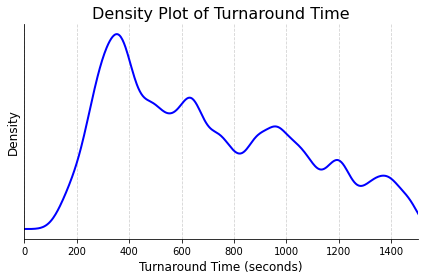

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
dft = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta type
dft['turnaround time'] = pd.to_timedelta(dft['turnaround time'])

# Filter rows where turnaround time is between 1 and 25 minutes
dft_filtered = dft[(dft['turnaround time'] >= pd.Timedelta(minutes=1)) & (dft['turnaround time'] <= pd.Timedelta(minutes=25))]

# Creating the density plot
ax = dft_filtered['turnaround time'].dt.total_seconds().plot(kind='density', color='blue', linewidth=2)

plt.title('Density Plot of Turnaround Time', fontsize=16)
plt.xlabel('Turnaround Time (seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0, 25 * 60)

ax.grid(color='lightgray', linestyle='--')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.yticks([])
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

The next blocks of code focus on the correlation analyses that are also found in the method section of the thesis.

In [14]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Select the variables of interest, including the non-numeric variable
variables_of_interest = [
    'SL_RICHTING',
    'SL_RIJKARAKTERISTIEK',
    'matSoort',
    'SL_MAT_LENGTE',
    'Wisselmachinist',
    'spitstype',
    'act_drglpt_stationsklasse',
    'materieelDienstgroep',
    'zitplaatsen',
    'vervoersplaatsen',
    'afstand',
    'aantal_bakken',
    'aantal_stellen',
    'turnaround time',
    'SL_COMBINEREN_IND',
    'SL_SPLITSEN_IND', 
    'act_drglpt_TBregio_afk' 
]

# Create a new dataframe with the selected variables
df_selected = df[variables_of_interest].copy()

# Convert the "turnaround time" column to timedelta format
df_selected['turnaround time'] = pd.to_timedelta(df_selected['turnaround time'])

# Perform one-hot encoding on non-numeric variables
df_encoded = pd.get_dummies(df_selected, columns=['act_drglpt_TBregio_afk', 'SL_RICHTING', 'SL_RIJKARAKTERISTIEK', 'matSoort', 'spitstype', 'act_drglpt_stationsklasse', 'materieelDienstgroep'])

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Find the variables correlated with "turnaround time"
correlated_vars = corr_matrix['turnaround time'].drop('turnaround time')

# Set a correlation threshold
correlation_threshold = 0.15

# Filter the correlated variables above the threshold
significant_correlations = correlated_vars[abs(correlated_vars) > correlation_threshold]

# Sort the correlations in descending order
significant_correlations = significant_correlations.sort_values(ascending=False)

# Print the significant correlated variables
print("Significant correlated variables in df:")
print(significant_correlations)

C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\3084924767.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


Significant correlated variables in df:
act_drglpt_stationsklasse_basis    0.245158
SL_RIJKARAKTERISTIEK_SPR           0.219189
act_drglpt_TBregio_afk_RBC Rtd     0.218578
matSoort_SNG                       0.161313
matSoort_VIRM                     -0.157049
afstand                           -0.158481
act_drglpt_TBregio_afk_RBC Ut     -0.163939
SL_MAT_LENGTE                     -0.189245
zitplaatsen                       -0.207255
vervoersplaatsen                  -0.210185
SL_RIJKARAKTERISTIEK_IC           -0.219189
act_drglpt_stationsklasse_mega    -0.273179
Name: turnaround time, dtype: float64


C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\1205096305.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


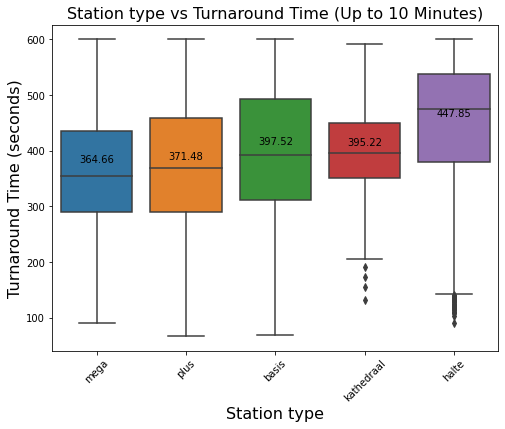

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Subset the data for turnaround times up to a certain time range
df_subset = df[df['turnaround time'] <= 600]

# Define the order of the station types
station_order = ['mega', 'plus', 'basis', 'kathedraal', 'halte']

# Create a boxplot to show the correlation between 'act_drglpt_stationsklasse' and different turnaround times
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_subset, x='act_drglpt_stationsklasse', y='turnaround time', order=station_order)
plt.xlabel('Station type', fontsize=16)
plt.ylabel('Turnaround Time (seconds)', fontsize=16)
plt.title('Station type vs Turnaround Time (Up to 10 Minutes)', fontsize=16)

# Calculate and display the average turnaround times
average_turnaround_subset = df_subset.groupby('act_drglpt_stationsklasse')['turnaround time'].mean()
for i, label in enumerate(station_order):
    plt.text(i, average_turnaround_subset[label] + 10, f'{average_turnaround_subset[label]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\2616507878.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


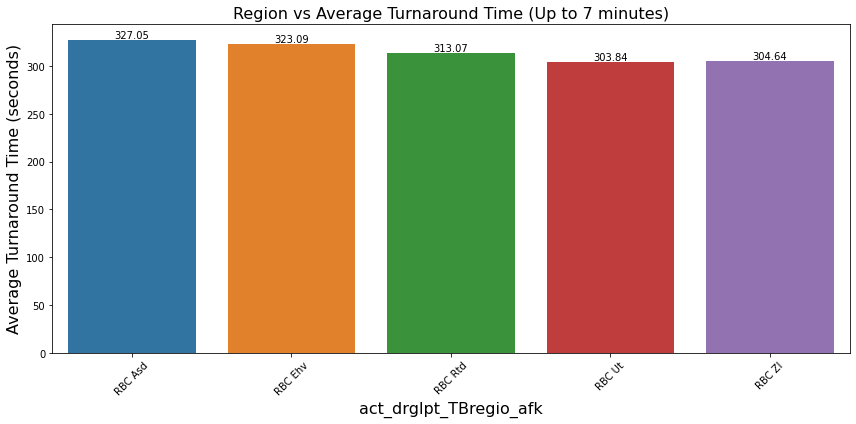

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Create a subset of the data with turnaround times up to a certain time range
subset_df = df[df['turnaround time'] <= 420]

# Calculate the average turnaround times
average_turnaround = subset_df.groupby('act_drglpt_TBregio_afk')['turnaround time'].mean().reset_index()

# Plotting a bar plot of average turnaround times
plt.figure(figsize=(12, 6))
sns.barplot(data=average_turnaround, x='act_drglpt_TBregio_afk', y='turnaround time')
plt.xlabel('act_drglpt_TBregio_afk', fontsize=16)
plt.ylabel('Average Turnaround Time (seconds)', fontsize=16)
plt.title('Region vs Average Turnaround Time (Up to 7 minutes)', fontsize=16)

# Add text annotations for the average values
for i, row in average_turnaround.iterrows():
    plt.text(i, row['turnaround time'], f'{row["turnaround time"]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\2179172722.py:7: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


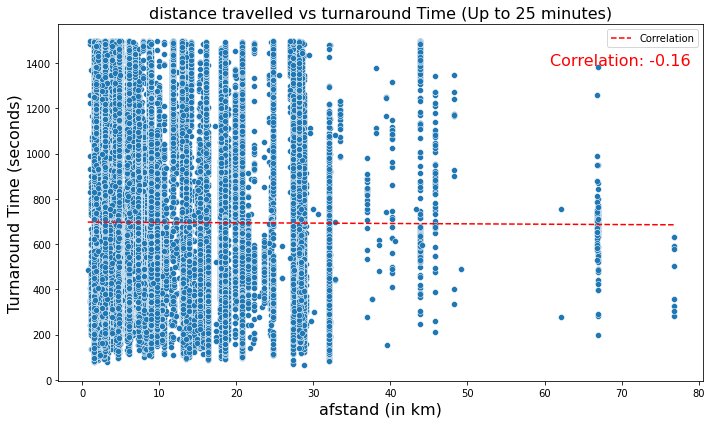

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Subset the data for "afstand" values up to 90
subset_df = df[(df['afstand'] <= 90) & (df['turnaround time'] <= 1500)]

# Plotting "afstand" against "turnaround time"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df, x='afstand', y='turnaround time')
plt.xlabel('afstand (in km)', fontsize=16)
plt.ylabel('Turnaround Time (seconds)', fontsize=16)
plt.title('distance travelled vs turnaround Time (Up to 25 minutes)', fontsize=16)

# Calculate the correlation coefficient
corr_coef = subset_df['afstand'].corr(subset_df['turnaround time'])

# Add the correlation line
x = np.linspace(subset_df['afstand'].min(), subset_df['afstand'].max(), 100)
y = corr_coef * (x - subset_df['afstand'].mean()) + subset_df['turnaround time'].mean()
plt.plot(x, y, color='red', linestyle='--', label='Correlation')

# Add the correlation value in the top right corner
plt.text(0.98, 0.92, f'Correlation: {corr_coef:.2f}', color='red', fontsize=16,
         ha='right', va='top', transform=plt.gca().transAxes)

plt.tight_layout()
plt.legend()
plt.show()

In [21]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Select the variables of interest
variables = ['SL_MAT_LENGTE', 'zitplaatsen', 'vervoersplaatsen']
subset_df = df[variables]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)

C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\3346581129.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


                  SL_MAT_LENGTE  zitplaatsen  vervoersplaatsen
SL_MAT_LENGTE          1.000000     0.831000          0.840113
zitplaatsen            0.831000     1.000000          0.977325
vervoersplaatsen       0.840113     0.977325          1.000000


C:\Users\arthu\AppData\Local\Temp\ipykernel_8296\1964387816.py:7: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


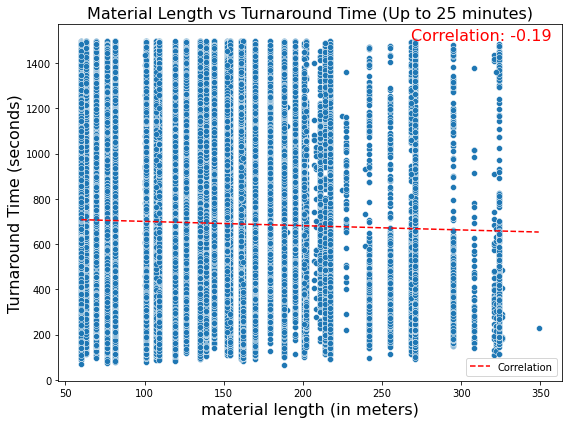

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Remove values where "SL_MAT_LENGTE" is 0 and filter turnaround time for varying ranges
subset_df = df[df['SL_MAT_LENGTE'] != 0 & (df['turnaround time'] > 60) & (df['turnaround time'] <= 1500)]

# Select the variables of interest
variables = ['SL_MAT_LENGTE', 'turnaround time']
subset_df = subset_df[variables]

# Compute the correlation coefficient
correlation_coef = subset_df['SL_MAT_LENGTE'].corr(subset_df['turnaround time'])

# Create a scatter plot with correlation line and value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_df, x='SL_MAT_LENGTE', y='turnaround time')
plt.xlabel('material length (in meters)', fontsize=16)
plt.ylabel('Turnaround Time (seconds)', fontsize=16)
plt.title('Material Length vs Turnaround Time (Up to 25 minutes)', fontsize=16)

# Add correlation line
x = np.linspace(subset_df['SL_MAT_LENGTE'].min(), subset_df['SL_MAT_LENGTE'].max(), 100)
y = correlation_coef * (x - subset_df['SL_MAT_LENGTE'].mean()) + subset_df['turnaround time'].mean()
plt.plot(x, y, color='red', linestyle='--', label='Correlation')

# Add correlation value in the top right corner
plt.text(0.98, 0.99, f'Correlation: {correlation_coef:.2f}', color='red', fontsize=16,
         ha='right', va='top', transform=plt.gca().transAxes)

plt.tight_layout()
plt.legend()
plt.show()


C:\Users\arthu\AppData\Local\Temp\ipykernel_8296\1635028271.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


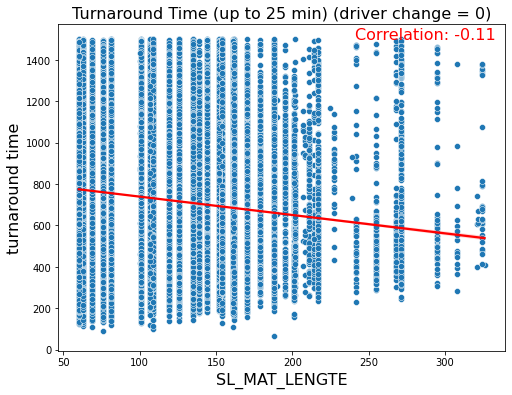

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Filter the DataFrame to include turnarounds between varying ranges of turnaround times
df_subset = df[(df['turnaround time'] > 60) & (df['turnaround time'] <= 1500)]

# Remove instances where 'SL_MAT_LENGTE' is 0
df_subset = df_subset[df_subset['SL_MAT_LENGTE'] != 0]

# Create a scatter plot to show the correlation between 'SL_MAT_LENGTE' and turnaround times for Wisselmachinist = 0
df_wm0 = df_subset[df_subset['Wisselmachinist'] == 0]
corr_coef_wm0 = df_wm0['SL_MAT_LENGTE'].corr(df_wm0['turnaround time'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_wm0, x='SL_MAT_LENGTE', y='turnaround time')
plt.xlabel('Material Length', fontsize=16)
plt.ylabel('Turnaround Time (seconds)', fontsize=16)
plt.title('Turnaround Time (up to 25 min) (driver change = 0)', fontsize=16)
sns.regplot(data=df_wm0, x='SL_MAT_LENGTE', y='turnaround time', scatter=False, color='red')

# Add correlation value in the top right corner
plt.text(0.98, 0.99, f'Correlation: {corr_coef_wm0:.2f}', color='red', fontsize=16,
         ha='right', va='top', transform=plt.gca().transAxes)

plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\3637182753.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


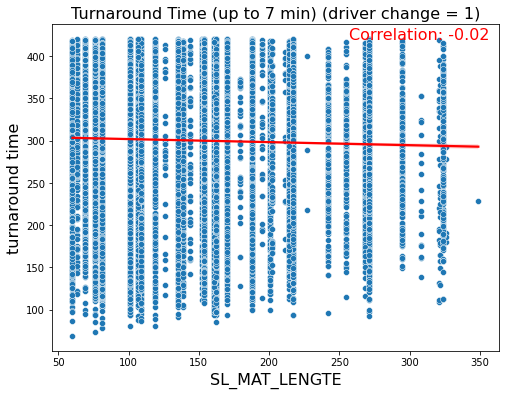

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Filter the DataFrame to include turnarounds between varying ranges of turnaround times
df_subset = df[(df['turnaround time'] > 60) & (df['turnaround time'] <= 420)]

# Remove instances where 'SL_MAT_LENGTE' is 0
df_subset = df_subset[df_subset['SL_MAT_LENGTE'] != 0]

# Create a scatter plot to show the correlation between 'SL_MAT_LENGTE' and turnaround times for Wisselmachinist = 1
df_wm0 = df_subset[df_subset['Wisselmachinist'] == 1]
corr_coef_wm0 = df_wm0['SL_MAT_LENGTE'].corr(df_wm0['turnaround time'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_wm0, x='SL_MAT_LENGTE', y='turnaround time')
plt.xlabel('Material Length', fontsize=16)
plt.ylabel('Turnaround Time (seconds)', fontsize=16)
plt.title('Turnaround Time (up to 7 min) (driver change = 1)', fontsize=16)
sns.regplot(data=df_wm0, x='SL_MAT_LENGTE', y='turnaround time', scatter=False, color='red')

# Add correlation value in the top right corner
plt.text(0.98, 0.99, f'Correlation: {corr_coef_wm0:.2f}', color='red', fontsize=16,
         ha='right', va='top', transform=plt.gca().transAxes)

plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_8296\2053675368.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


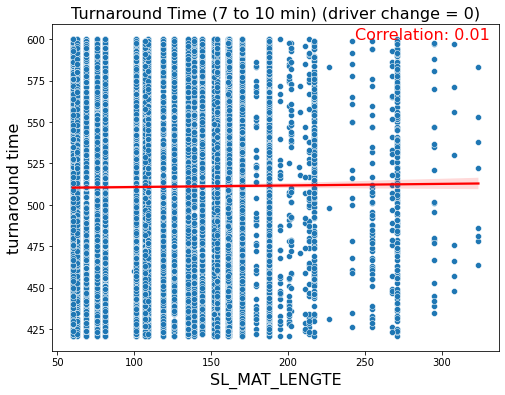

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Filter the DataFrame to include turnarounds between varying ranges of turnaround times
df_subset = df[(df['turnaround time'] > 420) & (df['turnaround time'] <= 600)]

# Remove instances where 'SL_MAT_LENGTE' is 0
df_subset = df_subset[df_subset['SL_MAT_LENGTE'] != 0]

# Create a scatter plot to show the correlation between 'SL_MAT_LENGTE' and turnaround times for Wisselmachinist = 0
df_wm0 = df_subset[df_subset['Wisselmachinist'] == 0]
corr_coef_wm0 = df_wm0['SL_MAT_LENGTE'].corr(df_wm0['turnaround time'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_wm0, x='SL_MAT_LENGTE', y='turnaround time')
plt.xlabel('Material Length', fontsize=16)
plt.ylabel('Turnaround Time (seconds)', fontsize=16)
plt.title('Turnaround Time (7 to 10 min) (driver change = 0)', fontsize=16)
sns.regplot(data=df_wm0, x='SL_MAT_LENGTE', y='turnaround time', scatter=False, color='red')

# Add correlation value in the top right corner
plt.text(0.98, 0.99, f'Correlation: {corr_coef_wm0:.2f}', color='red', fontsize=16,
         ha='right', va='top', transform=plt.gca().transAxes)

plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\1928014528.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


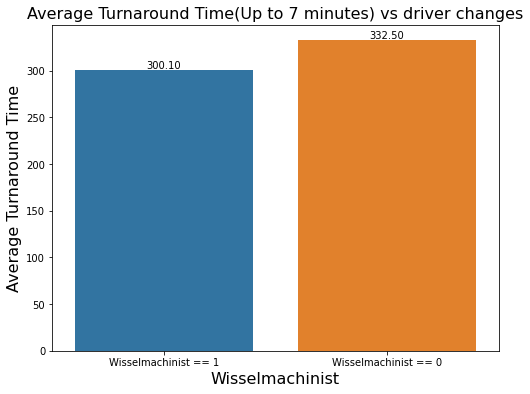

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert 'turnaround time' column to timedelta
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Filter the data for turnaround times up to 25 minutes
df = df[df['turnaround time'] <= 420]

# Filter the data for Wisselmachinist == 1
df_wissel_1 = df[df['Wisselmachinist'] == 1.0]

# Calculate the average turnaround time for Wisselmachinist == 1
avg_turnaround_1 = df_wissel_1['turnaround time'].mean()

# Filter the data for Wisselmachinist == 0
df_wissel_0 = df[df['Wisselmachinist'] == 0.0]

# Calculate the average turnaround time for Wisselmachinist == 0
avg_turnaround_0 = df_wissel_0['turnaround time'].mean()

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=['Wisselmachinist == 1', 'Wisselmachinist == 0'], y=[avg_turnaround_1, avg_turnaround_0])

# Add labels and title to the plot with increased font size
plt.xlabel('Wisselmachinist', fontsize=16)
plt.ylabel('Average Turnaround Time', fontsize=16)
plt.title('Average Turnaround Time(Up to 7 minutes) vs driver changes', fontsize=16)

# Annotate the bars with average turnaround times
plt.text(0, avg_turnaround_1, f'{avg_turnaround_1:.2f}', ha='center', va='bottom')
plt.text(1, avg_turnaround_0, f'{avg_turnaround_0:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_8296\3275005647.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


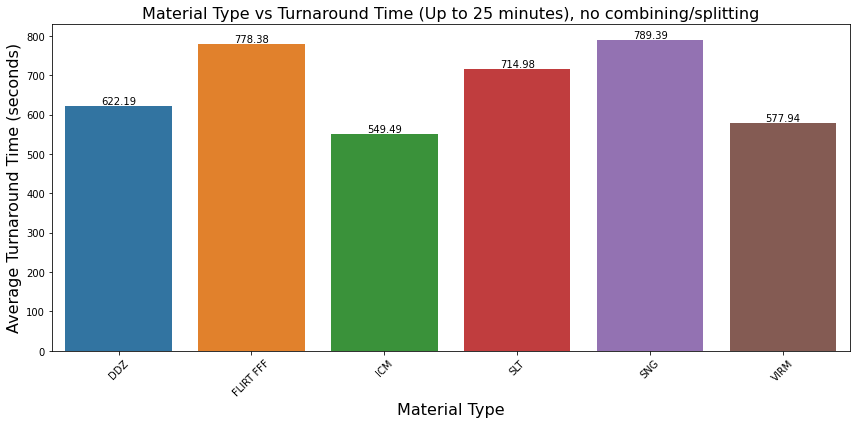

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Define the specific values to include in the "matSoort" column
matSoort_values = ['SNG', 'SLT', 'FLIRT FFF', 'VIRM', 'ICM', 'DDZ']

# Filter the DataFrame to include only the following conditions
subset_df = df[(df['matSoort'].isin(matSoort_values)) &
               (df['turnaround time'] <= 1500) &
               (df['SL_COMBINEREN_IND'] == 0) &
               (df['SL_SPLITSEN_IND'] == 0)]

# Calculate the average turnaround times
average_turnaround = subset_df.groupby('matSoort')['turnaround time'].mean().reset_index()

# Plotting a bar plot of average turnaround times
plt.figure(figsize=(12, 6))
sns.barplot(data=average_turnaround, x='matSoort', y='turnaround time')
plt.xlabel('Material Type', fontsize=16)
plt.ylabel('Average Turnaround Time (seconds)', fontsize=16)
plt.title('Material Type vs Turnaround Time (Up to 25 minutes), no combining/splitting', fontsize=16)

# Add text annotations for the average values
for i, row in average_turnaround.iterrows():
    plt.text(i, row['turnaround time'], f'{row["turnaround time"]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_8296\2276806604.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


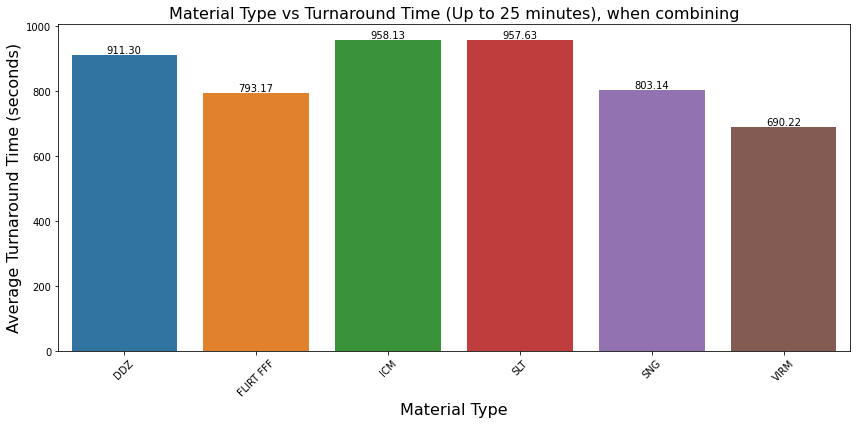

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Define the specific values to include in the "matSoort" column
matSoort_values = ['SNG', 'SLT', 'FLIRT FFF', 'VIRM', 'ICM', 'DDZ']

# Filter the DataFrame to include only the specified conditions
subset_df = df[(df['matSoort'].isin(matSoort_values)) &
               (df['turnaround time'] <= 1500) &
               (df['SL_COMBINEREN_IND'] == 1) &
               (df['SL_SPLITSEN_IND'] == 0)]

# Calculate the average turnaround times
average_turnaround = subset_df.groupby('matSoort')['turnaround time'].mean().reset_index()

# Plotting a bar plot of average turnaround times
plt.figure(figsize=(12, 6))
sns.barplot(data=average_turnaround, x='matSoort', y='turnaround time')
plt.xlabel('Material Type', fontsize=16)
plt.ylabel('Average Turnaround Time (seconds)', fontsize=16)
plt.title('Material Type vs Turnaround Time (Up to 25 minutes), when combining', fontsize=16)

# Add text annotations for the average values
for i, row in average_turnaround.iterrows():
    plt.text(i, row['turnaround time'], f'{row["turnaround time"]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_8296\4106789422.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


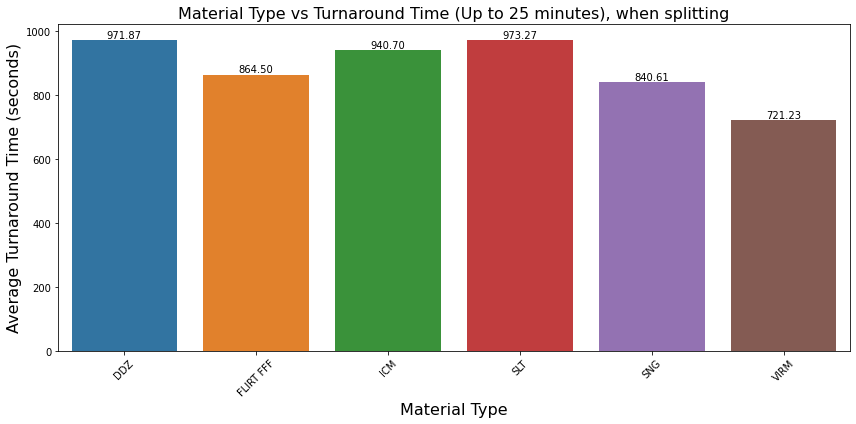

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()

# Define the specific values to include in the "matSoort" column
matSoort_values = ['SNG', 'SLT', 'FLIRT FFF', 'VIRM', 'ICM', 'DDZ']

# Filter the DataFrame to include only the following conditions
subset_df = df[(df['matSoort'].isin(matSoort_values)) &
               (df['turnaround time'] <= 1500) &
               (df['SL_COMBINEREN_IND'] == 0) &
               (df['SL_SPLITSEN_IND'] == 1)]

# Calculate the average turnaround times
average_turnaround = subset_df.groupby('matSoort')['turnaround time'].mean().reset_index()

# Plotting a bar plot of average turnaround times
plt.figure(figsize=(12, 6))
sns.barplot(data=average_turnaround, x='matSoort', y='turnaround time')
plt.xlabel('Material Type', fontsize=16)
plt.ylabel('Average Turnaround Time (seconds)', fontsize=16)
plt.title('Material Type vs Turnaround Time (Up to 25 minutes), when splitting', fontsize=16)

# Add text annotations for the average values
for i, row in average_turnaround.iterrows():
    plt.text(i, row['turnaround time'], f'{row["turnaround time"]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The next blocks of code focus on obtaining robust turnaround times that are shown in the results section of the thesis.

In [18]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert timedelta columns to numeric format
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time']).dt.total_seconds()

# Create a subset with Wisselmachinist = 0, SL_COMBINEREN_IND = 0, and SL_SPLITSEN_IND = 0
subset = df[(df['Wisselmachinist'] == 0) & (df['SL_COMBINEREN_IND'] == 0) & (df['SL_SPLITSEN_IND'] == 0)]

# Create subset with planned turnaround time of 4 minutes and SL_MAT_LENGTE <= 60
subset_4_minutes = subset[(subset['planned turnaround time'] == 4 * 60) & (subset['SL_MAT_LENGTE'] <= 60)]

# Calculate percentage of turnarounds shorter than 4 minutes + 59 seconds
percentage_4_minutes = (subset_4_minutes['turnaround time'] < (4 * 60 + 89)).mean() * 100

# Get row count for the subset
row_count_4_minutes = len(subset_4_minutes)

print("Subset with planned turnaround time of 4 minutes and SL_MAT_LENGTE <= 60:")
print(f"Percentage of turnarounds shorter than 4 minutes + 89 seconds: {percentage_4_minutes}%")
print(f"Row count: {row_count_4_minutes}")

C:\Users\arthu\AppData\Local\Temp\ipykernel_8296\2899023521.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


Subset with planned turnaround time of 4 minutes and SL_MAT_LENGTE <= 60:
Percentage of turnarounds shorter than 4 minutes + 89 seconds: 91.05691056910568%
Row count: 123


In [19]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert timedelta columns to numeric format
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time']).dt.total_seconds()

# Create a subset with Wisselmachinist = 0, SL_COMBINEREN_IND = 0, and SL_SPLITSEN_IND = 0
subset = df[(df['Wisselmachinist'] == 1) & (df['SL_COMBINEREN_IND'] == 0) & (df['SL_SPLITSEN_IND'] == 0)]

# Create subset with planned turnaround time of 4 minutes and SL_MAT_LENGTE <= 60
subset_4_minutes = subset[(subset['planned turnaround time'] == 4 * 60) & (subset['SL_MAT_LENGTE'] <= 60)]

# Calculate percentage of turnarounds shorter than 4 minutes + 59 seconds
percentage_4_minutes = (subset_4_minutes['turnaround time'] < (4 * 60 + 79)).mean() * 100

# Get row count for the subset
row_count_4_minutes = len(subset_4_minutes)

print("Subset with planned turnaround time of 4 minutes and SL_MAT_LENGTE <= 60:")
print(f"Percentage of turnarounds shorter than 4 minutes + 79 seconds: {percentage_4_minutes}%")
print(f"Row count: {row_count_4_minutes}")

C:\Users\arthu\AppData\Local\Temp\ipykernel_8296\1871003627.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


Subset with planned turnaround time of 4 minutes and SL_MAT_LENGTE <= 60:
Percentage of turnarounds shorter than 4 minutes + 79 seconds: 90.69767441860465%
Row count: 129


C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\1387253317.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')
C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\1387253317.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=subset_time_range, x='SL_COMBINEREN_IND', y='turnaround time', ci=None)


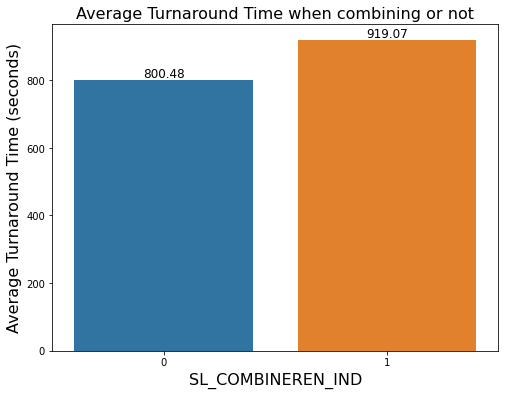

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert columns to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time']).dt.total_seconds()

# Subset the data to include only turnaround time values between 6 and 25 minutes
subset_time_range = df[(df['turnaround time'] >= 6 * 60) & (df['turnaround time'] <= 25 * 60)]

# Calculate the average turnaround time for SL_COMBINEREN_IND = 1 and SL_COMBINEREN_IND = 0
avg_turnaround_time = subset_time_range.groupby('SL_COMBINEREN_IND')['turnaround time'].mean()

# Create a bar plot to compare average turnaround times
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=subset_time_range, x='SL_COMBINEREN_IND', y='turnaround time', ci=None)
plt.xlabel('SL_COMBINEREN_IND', fontsize=16)
plt.ylabel('Average Turnaround Time (seconds)', fontsize=16)
plt.title('Average Turnaround Time when combining or not', fontsize=16)
plt.xticks([0, 1], ['0', '1'])

# Add the average values as text annotations on the bars
for i, avg in enumerate(avg_turnaround_time):
    ax.text(i, avg, f'{avg:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()


C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\1823314057.py:6: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')
C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\1823314057.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=subset_time_range, x='SL_SPLITSEN_IND', y='turnaround time', ci=None)


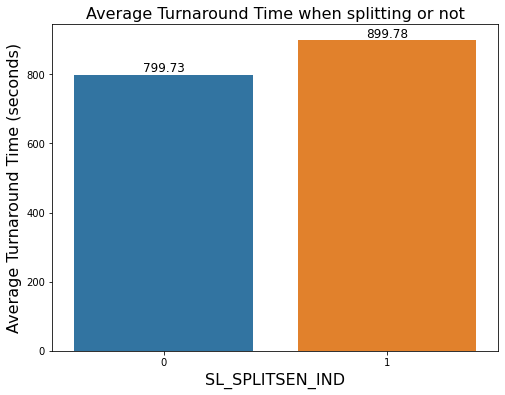

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert "turnaround time" column to timedelta variable
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time']).dt.total_seconds()

# Subset the data to include only turnaround time values between 6 and 25 minutes
subset_time_range = df[(df['turnaround time'] >= 6 * 60) & (df['turnaround time'] <= 25 * 60)]

# Calculate the average turnaround time for SL_SPLITSEN_IND = 1 and SL_SPLITSEN_IND = 0
avg_turnaround_time = subset_time_range.groupby('SL_SPLITSEN_IND')['turnaround time'].mean()

# Create a bar plot to compare average turnaround time
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=subset_time_range, x='SL_SPLITSEN_IND', y='turnaround time', ci=None)
plt.xlabel('SL_SPLITSEN_IND', fontsize=16)
plt.ylabel('Average Turnaround Time (seconds)', fontsize=16)
plt.title('Average Turnaround Time when splitting or not', fontsize=16)
plt.xticks([0, 1], ['0', '1'])

# Add the average values as text annotations on the bars
for i, avg in enumerate(avg_turnaround_time):
    ax.text(i, avg, f'{avg:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

In [16]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert timedelta columns to numeric format
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time']).dt.total_seconds()

# Subset the data to include only rows where SL_COMBINEREN_IND = 1
subset = df[df['SL_COMBINEREN_IND'] == 1]

# Create a subset based on planned turnaround time values of 5 minutes
subset_time_range = subset[(subset['planned turnaround time'] >= 5 * 60) & (subset['planned turnaround time'] <= 5 * 60)]

# Define the values in matSoort for further subsetting
matsoort_values = ['VIRM']

# calculate percentage on time and add row count
for matsoort in matsoort_values:
    subset_matsoort = subset_time_range[subset_time_range['matSoort'] == matsoort]
    count_longer = (subset_matsoort['planned turnaround time'] + 89) > subset_matsoort['turnaround time']
    percentage = (count_longer.mean()) * 100
    row_count = len(subset_matsoort)
    print(f"matSoort: {matsoort}, Percentage: {percentage:.2f}%, Row Count: {row_count}")

C:\Users\arthu\AppData\Local\Temp\ipykernel_8296\217946757.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


matSoort: VIRM, Percentage: 98.40%, Row Count: 250


In [17]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert timedelta columns to numeric format
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time']).dt.total_seconds()

# Subset the data to include only rows where SL_COMBINEREN_IND = 1
subset = df[df['SL_COMBINEREN_IND'] == 1]

# Create a subset based on planned turnaround time values of 6 minutes
subset_time_range = subset[(subset['planned turnaround time'] >= 6 * 60) & (subset['planned turnaround time'] <= 6 * 60)]

# Define the values in matSoort for further subsetting
matsoort_values = ['SNG']

# calculate percentage on time and add row count
for matsoort in matsoort_values:
    subset_matsoort = subset_time_range[subset_time_range['matSoort'] == matsoort]
    count_longer = (subset_matsoort['planned turnaround time'] + 79) > subset_matsoort['turnaround time']
    percentage = (count_longer.mean()) * 100
    row_count = len(subset_matsoort)
    print(f"matSoort: {matsoort}, Percentage: {percentage:.2f}%, Row Count: {row_count}")

C:\Users\arthu\AppData\Local\Temp\ipykernel_8296\2996432295.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


matSoort: SNG, Percentage: 88.33%, Row Count: 60


In [186]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert timedelta columns to numeric format
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time']).dt.total_seconds()

# Subset the data to include only rows where SL_COMBINEREN_IND = 1
subset = df[df['SL_SPLITSEN_IND'] == 1]

# Create a subset based on planned turnaround time values of 5 minutes
subset_time_range = subset[(subset['planned turnaround time'] >= 5 * 60) & (subset['planned turnaround time'] <= 5 * 60)]

# Define the values in matSoort for further subsetting
matsoort_values = ['VIRM']

# calculate percentage on time and add row count
for matsoort in matsoort_values:
    subset_matsoort = subset_time_range[subset_time_range['matSoort'] == matsoort]
    count_longer = (subset_matsoort['planned turnaround time'] + 89) > subset_matsoort['turnaround time']
    percentage = (count_longer.mean()) * 100
    row_count = len(subset_matsoort)
    print(f"matSoort: {matsoort}, Percentage: {percentage:.2f}%, Row Count: {row_count}")

C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\1624952263.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


matSoort: VIRM, Percentage: 87.57%, Row Count: 169


In [200]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert timedelta columns to numeric format
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time']).dt.total_seconds()

# Subset the data to include only rows where SL_COMBINEREN_IND = 1
subset = df[df['SL_SPLITSEN_IND'] == 1]

# Create a subset based on planned turnaround time values of 6 minutes
subset_time_range = subset[(subset['planned turnaround time'] >= 6 * 60) & (subset['planned turnaround time'] <= 6 * 60)]

# Sort the subset_time_range DataFrame by turnaround time in descending order
subset_time_range_sorted = subset_time_range.sort_values('turnaround time', ascending=False)

# Remove the highest 5 turnaround time values (outliers)
subset_time_range_trimmed = subset_time_range_sorted.iloc[5:]

# Define the values in matSoort for further subsetting
matsoort_values = ['SLT']

# calculate percentage on time and add row count
for matsoort in matsoort_values:
    subset_matsoort = subset_time_range_trimmed[subset_time_range_trimmed['matSoort'] == matsoort]
    count_longer = (subset_matsoort['planned turnaround time'] + 89) > subset_matsoort['turnaround time']
    percentage = (count_longer.mean()) * 100
    row_count = len(subset_matsoort)
    print(f"matSoort: {matsoort}, Percentage: {percentage:.2f}%, Row Count: {row_count}")

C:\Users\arthu\AppData\Local\Temp\ipykernel_6016\989036221.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


matSoort: SLT, Percentage: 87.04%, Row Count: 54


These next blocks of code prove the impact of an unknown variable on the robustness percentages, as is discussed in the discussion part of the thesis.

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert timedelta columns to numeric format
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time']).dt.total_seconds()

# Subset the data to include only rows where SL_COMBINEREN_IND = 1
subset = df[df['SL_COMBINEREN_IND'] == 1]

# Create a subset based on planned turnaround time values of 7 minutes
subset_time_range = subset[(subset['planned turnaround time'] >= 6 * 60) & (subset['planned turnaround time'] <= 6 * 60)]

# Define the values in matSoort for further subsetting
matsoort_values = ['SNG']

# calculate percentage on time and add row count
for matsoort in matsoort_values:
    subset_matsoort = subset_time_range[subset_time_range['matSoort'] == matsoort]
    count_longer = (subset_matsoort['planned turnaround time'] + 59) > subset_matsoort['turnaround time']
    percentage = (count_longer.mean()) * 100
    row_count = len(subset_matsoort)
    print(f"matSoort: {matsoort}, Percentage: {percentage:.2f}%, Row Count: {row_count}")

C:\Users\arthu\AppData\Local\Temp\ipykernel_9292\949906819.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


matSoort: SNG, Percentage: 85.00%, Row Count: 60


In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')

# Convert timedelta columns to numeric format
df['turnaround time'] = pd.to_timedelta(df['turnaround time']).dt.total_seconds()
df['planned turnaround time'] = pd.to_timedelta(df['planned turnaround time']).dt.total_seconds()

# Subset the data to include only rows where SL_COMBINEREN_IND = 1
subset = df[df['SL_COMBINEREN_IND'] == 1]

# Create a subset based on planned turnaround time values of 7 minutes
subset_time_range = subset[(subset['planned turnaround time'] >= 7 * 60) & (subset['planned turnaround time'] <= 7 * 60)]

# Define the values in matSoort for further subsetting
matsoort_values = ['SNG']

# calculate percentage on time and add row count
for matsoort in matsoort_values:
    subset_matsoort = subset_time_range[subset_time_range['matSoort'] == matsoort]
    count_longer = (subset_matsoort['planned turnaround time'] + 59) > subset_matsoort['turnaround time']
    percentage = (count_longer.mean()) * 100
    row_count = len(subset_matsoort)
    print(f"matSoort: {matsoort}, Percentage: {percentage:.2f}%, Row Count: {row_count}")

C:\Users\arthu\AppData\Local\Temp\ipykernel_9292\782845912.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/universiteit/thesis 2023/data/final datasets/Datasets with turnarounds/final dataset.csv', sep=',')


matSoort: SNG, Percentage: 69.61%, Row Count: 102
